In [50]:
import pandas as pd
train_data = pd.read_csv('/content/drive/MyDrive/Datasets/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Datasets/test.csv')

In [5]:
train_data.value_counts('Survived')

Survived
0    549
1    342
Name: count, dtype: int64

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
pd.set_option('display.max_columns', None)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
y_train = train_data['Survived']
train_data = train_data.drop(['Name', 'Ticket','Survived','PassengerId','Cabin'], axis=1)



wHATEVER WORKS BETTER

In [44]:
print(test_data.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [45]:
#train_data['age'].fillna(train_data['age'].mean(), inplace=True)
#test_data['age'].fillna(test_data['age'].mean(), inplace=True)

train_data['Age'].fillna(-1, inplace=True)
test_data['Age'].fillna(-1, inplace=True)
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)
train_data['Embarked'].fillna('S', inplace=True)
test_data['Embarked'].fillna('S', inplace=True)

In [10]:
train_data.value_counts('Parch')

Parch
0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: count, dtype: int64

In [11]:
print(train_data.isnull().sum())


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [13]:
train_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


Preprocessing the data data for the model

In [14]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ['Pclass',"Age", "Fare", "Parch",'SibSp']), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["Sex", "Embarked"])
)

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(train_data, y_train, test_size=0.2, random_state=42)


In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


In [16]:
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['Pclass', 'Age', 'Fare', 'Parch', 'SibSp']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Sex', 'Embarked'])])

In [17]:
# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [18]:
X_train_normal[0]

array([0.        , 0.57407407, 0.0556283 , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ])

In [19]:
import tensorflow as tf
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(50),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1,activation = 'sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy',
                          optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
                          metrics=['accuracy'])

# Fit the model for 200 epochs (same as insurance_model_2)
history_1 = model.fit(X_train_normal,y_train,
                      validation_data=(X_test_normal, y_test),
                        epochs=10,verbose = 1)

Epoch 1/10
23/23 [==============================] - 3s 35ms/step - loss: 0.5181 - accuracy: 0.7654 - val_loss: 0.4853 - val_accuracy: 0.7542
Epoch 2/10
23/23 [==============================] - 0s 12ms/step - loss: 0.4805 - accuracy: 0.7865 - val_loss: 0.4586 - val_accuracy: 0.7821
Epoch 3/10
23/23 [==============================] - 0s 11ms/step - loss: 0.4715 - accuracy: 0.7851 - val_loss: 0.4502 - val_accuracy: 0.7933
Epoch 4/10
23/23 [==============================] - 0s 11ms/step - loss: 0.4681 - accuracy: 0.7949 - val_loss: 0.4440 - val_accuracy: 0.7933
Epoch 5/10
23/23 [==============================] - 0s 13ms/step - loss: 0.4665 - accuracy: 0.7893 - val_loss: 0.4575 - val_accuracy: 0.7989
Epoch 6/10
23/23 [==============================] - 0s 14ms/step - loss: 0.4712 - accuracy: 0.7949 - val_loss: 0.4425 - val_accuracy: 0.7598
Epoch 7/10
23/23 [==============================] - 0s 10ms/step - loss: 0.4671 - accuracy: 0.8020 - val_loss: 0.4506 - val_accuracy: 0.7654
Epoch 8/10
23

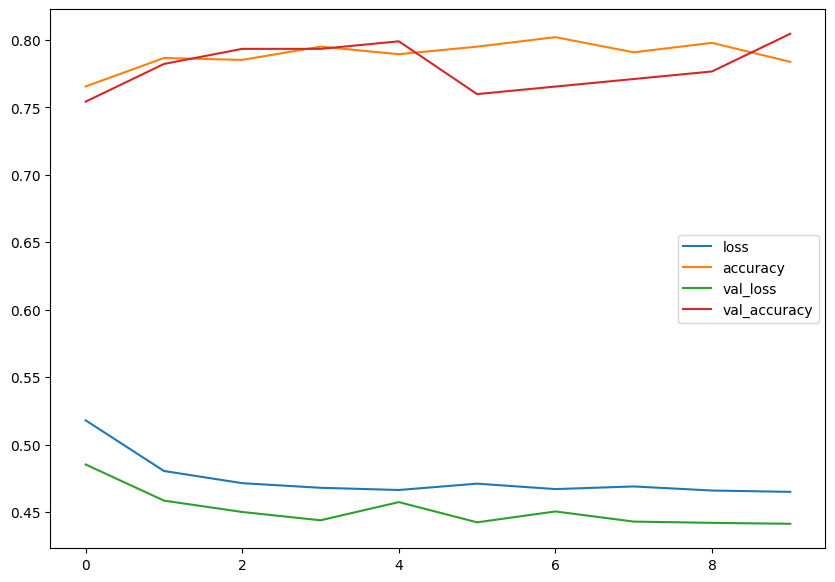

In [20]:
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(10, 7));

In [21]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [22]:
ct.fit(test_data)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['Pclass', 'Age', 'Fare', 'Parch', 'SibSp']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Sex', 'Embarked'])])

In [23]:
test_data_normal = ct.transform(test_data)

In [24]:
test_data_normal[1]

array([1.        , 0.62337662, 0.01366309, 0.        , 0.125     ,
       1.        , 0.        , 0.        , 0.        , 1.        ])

In [25]:
test_data_normal[1]

array([1.        , 0.62337662, 0.01366309, 0.        , 0.125     ,
       1.        , 0.        , 0.        , 0.        , 1.        ])

In [46]:
predictions = model.predict(test_data_normal)

14/14 [==============================] - 0s 2ms/step


In [27]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [51]:
test_data = test_data.drop(['Pclass', 	'Sex' ,	'Age', 	'SibSp' ,	'Parch' ,	'Fare' ,	'Embarked','Name', 	'Ticket' ,	'Cabin'], axis=1)
test_data.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [52]:
predictions_int = predictions.round()

In [53]:
predictions_int.shape

(418, 1)

In [54]:
test_data['Survived'] = predictions_int

In [59]:
test_data["Survived"]
test_data.value_counts('Survived')

Survived
0.0    279
1.0    138
Name: count, dtype: int64

In [33]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
 7   Survived  417 non-null    float32
dtypes: float32(1), float64(2), int64(3), object(2)
memory usage: 24.6+ KB


In [68]:
test_data['Survived'].fillna(1, inplace=True)
test_data.info()
test_data.reset_index(drop=True, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    float32
dtypes: float32(1), int64(1)
memory usage: 5.0 KB


In [71]:
test_data.to_csv('results.csv',index = False)